# Wave Equation in 2D 

\begin{equation*}
\frac{\partial^2 \mathbf{u}}{\partial t^2} = c^2 \times \nabla^2 \mathbf{u} 
\end{equation*}

In [1]:
"""
==========================================================================================================
This code is a Julia implementation of the Matlab code explored in:
Spectral Methods in Matlab
Lloyd N. Trefethen
2000
http://www.comlab.ox.ac.uk/oucl/work/nick.trefethen.
==========================================================================================================
Adapted By: Jeremy Dudo

This code is purely educational, as a fun exercise in translating MATLAB code to Julia, as well as attempting to learn 
the math and coding structures necessary to execute. Comments are entirely my own, hopefully to seamlessly communicate 
in english what is happening! 

Enjoy :)
==========================================================================================================
"""

# Import Packages
using LinearAlgebra, Plots, SparseArrays, Interpolations, FFTW, ProgressMeter
pyplot();

┌ Info: Recompiling stale cache file C:\Users\Jeremy\.julia\compiled\v1.1\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\Jeremy\.julia\compiled\v1.1\PyPlot\oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


In [2]:
# Construct the mesh

# Density of mesh
N = 48; 

# Even spacing 0 -> 1
x = cos.(pi* (0:N)/N);
y = x';

# time stepping 
dt = 6/(N^2);

# make mesh
meshgrid = [(i,j) for i=x[:], j=y[:]];
yy = first.(meshgrid);
xx = last.(meshgrid);


plotgap = round( (1/3) / dt );
dt = (1/3)/plotgap;

# initial condition vv, and previous step condition vvold
global vv = exp.(-40* ((xx .- 0.4).^2 + yy.^2)); # this initial mesh is a standard gaussian shape
global vvold =vv;

In [3]:
# setup progressbar

# duration
nn = Int(3*plotgap);
prog = Progress(nn, 1);

Progress:   0%|█                                        |  ETA: 9:05:14C:\Users\Jeremy\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)
Progress: 100%|█████████████████████████████████████████| Time: 0:06:60


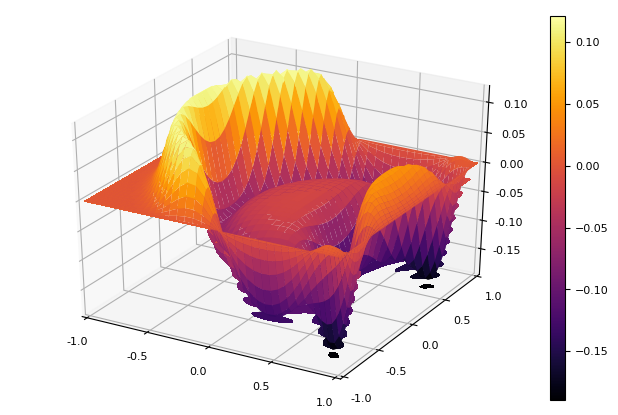

┌ Info: Saved animation to 
│   fn = C:\Users\Jeremy\Desktop\Presentable\waveEqn2D\tmp.gif
└ @ Plots C:\Users\Jeremy\.julia\packages\Plots\47Tik\src\animation.jl:90


Plots.AnimatedGif("C:\\Users\\Jeremy\\Desktop\\Presentable\\waveEqn2D\\tmp.gif")

In [5]:
# generate a gif of the frames of animation!
@gif for n = 0:nn
    
    # plot a surface countour plot
    p = Plots.plot(xx, yy, vv, st = [:surface, :contourf])

    # placeholders for the u_xx and u_yy matrices of values
    uxx = zeros(N+1, N+1); 
    uyy = zeros(N+1, N+1);
    ii = 2:N;

    # spectral method 
    for i = 2:N
        v = vv[i,:]; V = [v; reverse(v[ii], dims=1)]
        U = real(fft(V))
        W1 = real(ifft( im*[0:N-1; 0; 1-N:-1].*U))
        W2 = real(ifft(-[0:N; 1-N:-1].^2. .*U))
        uxx[i,ii] = W2[ii] ./ (1 .- x[ii].^2) .- x[ii] .* W1[ii] ./ (1 .- x[ii].^2).^(3/2)
    end

    for j = 2:N
        v = vv[:,j]; V = [v' reverse(v[ii],dims=1)']
        U = real(fft(V))
        W1 = real(ifft( im*[0:N-1; 0; 1-N:-1]'.*U))
        W2 = real(ifft(-[0:N; 1-N:-1]'.^2. .*U))
        uyy[ii, j] = W2[ii] ./ (1 .- y[ii].^2) .- y[ii] .* W1[ii] ./ (1 .- y[ii].^2).^(3/2)
    end

    # midpoint stepping method
    vvnew = 2*vv - vvold + dt^2 .*(uxx+uyy)
    
    # update global values
    global vvold = vv;
    global vv = vvnew; 

    # step in the progressmeter
    next!(prog)
end